# Loading and Manipulating Files in Julia

In [24]:
using DelimitedFiles
using Dates
wikiEVDraw = DelimitedFiles.readdlm("wikipediaEVDraw.csv", ',');

In [22]:
for num = 3:7 println("num is now $num") end 

num is now 3
num is now 4
num is now 5
num is now 6
num is now 7


In [4]:
testvalues = [23, "name", '≈']
for x in testvalues println("Value of x = $x") end

Value of x = 23
Value of x = name
Value of x = ≈


In [19]:
col1 = wikiEVDraw[:,1] # All rows, 1st column
for i = 1:length(col1)
    col1[i] = Dates.DateTime(col1[i], "d u y")
end

2014-03-22T00:00:00

In [20]:
DaysSinceMar22(day) = Dates.datetime2rata(day) - Dates.datetime2rata(col1[length(col1)])
epidays = Array{Int64}(undef, length(col1))
for i = 1:length(col1)
    epidays[i] = DaysSinceMar22(col1[i])
end

In [21]:
wikiEVDraw[:,1] = epidays
DelimitedFiles.writedlm("wikipediaEVDconverted.csv", wikiEVDraw, ',')

# Plotting In Julia

In [27]:
using Plots # This may take a while... First load 

### Activate the 'GR' backend for use with plots

Calling `using Plots` precomiles a lot of information to do with plots themselves. However, we still need to define what **backend** we want to use with our plots.

A "backend" is, as I understand, the data-processing powerhouse chosen prior to plotting the data. There are different backends each with their own intended situations for use, pros & cons. 

The idea is that identical plotting code can have the backend switched out without alterations.

List of backends available in Julia:
https://docs.juliaplots.org/latest/backends/

And the plots homepage: https://juliaplots.github.io/

In [28]:
gr()

Plots.GRBackend()

In [33]:
EVDdata = DelimitedFiles.readdlm("wikipediaEVDconverted.csv", ',');
epidays = EVDdata[:,1]; # All rows of first column, days since March 22 2015
allcases = EVDdata[:,2]; # Same here, epidemic cases.

Int64

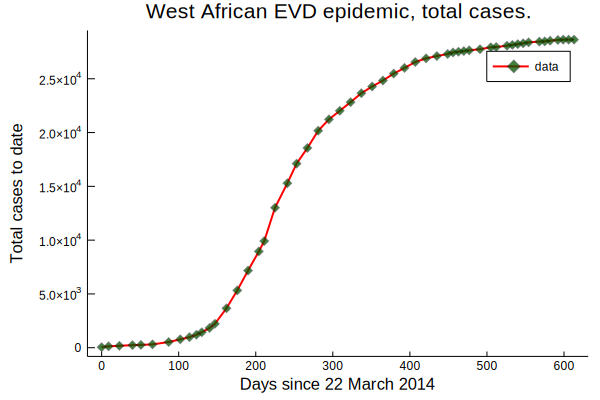

In [44]:
plot(epidays, allcases, 
    linetype=:scatter, 
    marker=(:d, 0.5, "green"),
    title="West African EVD epidemic, total cases.",
    xlabel="Days since 22 March 2014",
    ylabel="Total cases to date",
    line=(:path, 2.0, "red"),
    grid=false,
    label="data"
)

In [45]:
savefig("EVDplot_noformat") # Should save as .png
savefig("EVDplot.pdf")

LoadError: syntax: invalid identifier name "?"

## If statements to clean up dataset

In [68]:
EVDdata[end-9:end, :] #Isolating the last 10 lines of our data. Notice there are some non-numerical values there.

10×9 Array{Any,2}:
 123  1201  672  427  319  249     129     525     224   
 114   982  613  411  310  174     106     397     197   
 102   779  481  412  305  115      75     252     101   
  87   528  337  398  264   33      24      97      49   
  66   309  202  281  186   12      11      16       5   
  51   260  182  248  171   12      11        "–"     "–"
  40   239  160  226  149   13      11        "-"     "-"
  23   176  110  168  108    8       2        "–"     "–"
   9   130   82  122   80    8       2        "–"     "–"
   0    49   29   49   29     "–"     "–"     "–"     "–"

Let's use the ```isdigit()``` function to determine where numerical values do not exist. 

In [84]:
rows, cols = size(EVDdata)
for j = 1:cols
    for i = 1:rows
        if !isdigit(string(EVDdata[i,j])[1]) #Look at 1st character of array element [i,j]. Is it NOT a digit?
            EVDdata[i,j] = 0
        end
    end
end

In [85]:
EVDdata[end-9:end, :]

10×9 Array{Any,2}:
 123  1201  672  427  319  249  129  525  224
 114   982  613  411  310  174  106  397  197
 102   779  481  412  305  115   75  252  101
  87   528  337  398  264   33   24   97   49
  66   309  202  281  186   12   11   16    5
  51   260  182  248  171   12   11    0    0
  40   239  160  226  149   13   11    0    0
  23   176  110  168  108    8    2    0    0
   9   130   82  122   80    8    2    0    0
   0    49   29   49   29    0    0    0    0

In [86]:
epidays = EVDdata[:,1]
EVDcasebycountry = EVDdata[:, [4, 6, 8]] # picking out data from 3 countries

#load plots, backend, and plot data
using Plots
gr()
plot(epidays, EVDcasebycountry)

ErrorException: Cannot convert Array{Any,2} to series data for plotting